In [1]:
import ktrain
from ktrain import text
import pandas as pd

using Keras version: 2.2.4-tf


In [2]:
import tensorflow as tf

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [4]:
df_train = pd.read_csv('../../data/eduskunta-vkk/train.csv')
df_dev = pd.read_csv('../../data/eduskunta-vkk/dev.csv')
df_test = pd.read_csv('../../data/eduskunta-vkk/test.csv')
#df_test = None


In [5]:
#labels_to_keep = ['__label__Terveys', '__label__Talous','__label__Lemmikit','__label__Urheilu ja kuntoilu','__label__Matkailu']

#df = df[df.label.isin(labels_to_keep)]
#g = df.groupby('label')

#df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

In [6]:
#df['text_and_title'] = df['text_and_title'].fillna('NA')

In [7]:
df_train.rename(columns={'sentence':'text','ministry':'label'}, inplace=True)
df_dev.rename(columns={'sentence':'text','ministry':'label'}, inplace=True)
df_test.rename(columns={'sentence':'text','ministry':'label'}, inplace=True)

In [8]:
df_test.head()

,text,label
0,Niistä pitkäaikaissairaista ja vammaisista hen...,oikeus- ja työministeri
1,Turvapaikkapuhuttelussa hakijan perusteet selv...,sisäministeri
2,Tästä on myös esimerkiksi kuluttajariitalautak...,oikeus- ja työministeri
3,Tietojen perusteella on havaittu että kehittäm...,liikenne- ja viestintäministeri
4,Suomen Lontoon suurlähetystö seuraa tilannetta...,sisäministeri


In [9]:
#df = df[['label','text_and_title']]

In [10]:
df_train = pd.concat([df_train, df_train.label.astype('str').str.get_dummies()], axis=1, sort=False)
df_dev = pd.concat([df_dev, df_dev.label.astype('str').str.get_dummies()], axis=1, sort=False)


In [11]:
df_train.head()

,text,label,elinkeinoministeri,"eurooppa-, kulttuuri- ja urheiluministeri",kunta- ja uudistusministeri,liikenne- ja viestintäministeri,maatalous- ja ympäristöministeri,oikeus- ja työministeri,opetus- ja kulttuuriministeri,perhe- ja peruspalveluministeri,puolustusministeri,pääministeri,sisäministeri,sosiaali- ja terveysministeri,ulkomaankauppa- ja kehitysministeri,ulkoministeri,valtiovarainministeri
0,Nykyisessä käytännössä voi siten syntyä tilant...,valtiovarainministeri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Lisäksi korkein hallinto-oikeus katsoi , että ...",sosiaali- ja terveysministeri,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Toissijaisuuden arviointi jää viime kädessä tu...,liikenne- ja viestintäministeri,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Kiire tai sen tunne usein kasvavat .,perhe- ja peruspalveluministeri,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Vähittäiskaupat voivat myös perustuslain turva...,maatalous- ja ympäristöministeri,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
df_train=df_train.drop(columns=('label'))
df_dev=df_dev.drop(columns=('label'))

In [13]:
df_train.reset_index(drop=True, inplace=True)
df_dev.reset_index(drop=True, inplace=True)

In [14]:
df_train.head()

,text,elinkeinoministeri,"eurooppa-, kulttuuri- ja urheiluministeri",kunta- ja uudistusministeri,liikenne- ja viestintäministeri,maatalous- ja ympäristöministeri,oikeus- ja työministeri,opetus- ja kulttuuriministeri,perhe- ja peruspalveluministeri,puolustusministeri,pääministeri,sisäministeri,sosiaali- ja terveysministeri,ulkomaankauppa- ja kehitysministeri,ulkoministeri,valtiovarainministeri
0,Nykyisessä käytännössä voi siten syntyä tilant...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Lisäksi korkein hallinto-oikeus katsoi , että ...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Toissijaisuuden arviointi jää viime kädessä tu...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Kiire tai sen tunne usein kasvavat .,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Vähittäiskaupat voivat myös perustuslain turva...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
label_columns = [i for i in df_train.columns[1:]]


In [16]:
df_train.to_csv('train.csv', index=False, sep = '\t')
df_dev.to_csv('dev.csv', index=False, sep = '\t')
df_test.to_csv('test.csv', index=False, sep = '\t')

In [17]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv('train.csv', 
                   text_column='text',
                   label_columns = label_columns,
                   val_filepath='dev.csv',
                   max_features=50000, maxlen=75, 
                   preprocess_mode='bert', 
                   lang=None,      # auto-detected
                   sep='\t', random_state=42,       
                   verbose=0)

In [18]:
model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=8)

Is Multi-Label? False
maxlen is 75
done.


In [19]:
#Free up memory
df_train = None
df_dev = None
df_test = None

simulating training for different learning rates... this may take a few moments...
Train on 49693 samples
Epoch 1/1024
 9448/49693 [====>.........................] - ETA: 41:13 - loss: 2.6394 - accuracy: 0.2650

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


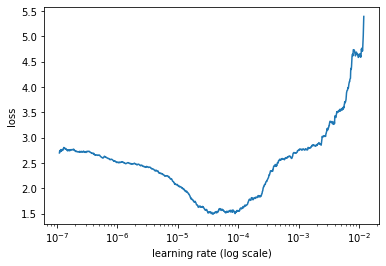

In [20]:
learner.lr_find()
learner.lr_plot()

In [21]:
learner.fit_onecycle(10e-5, 1)



begin training using onecycle policy with max lr of 0.0001...
Train on 49693 samples, validate on 2000 samples
49693/49693 [==============================] - 3177s 64ms/sample - loss: 1.2047 - accuracy: 0.6370 - val_loss: 0.9244 - val_accuracy: 0.7070


In [22]:
learner.validate(val_data=(x_test, y_test), class_names=label_columns)

                                           precision    recall  f1-score   support

                       elinkeinoministeri       0.56      0.55      0.55        82
eurooppa-, kulttuuri- ja urheiluministeri       0.71      0.53      0.61        32
              kunta- ja uudistusministeri       0.62      0.45      0.52        40
          liikenne- ja viestintäministeri       0.75      0.77      0.76       141
         maatalous- ja ympäristöministeri       0.79      0.82      0.80       288
                  oikeus- ja työministeri       0.55      0.67      0.60       224
            opetus- ja kulttuuriministeri       0.79      0.80      0.79       211
          perhe- ja peruspalveluministeri       0.71      0.70      0.70       333
                       puolustusministeri       0.59      0.62      0.60        21
                             pääministeri       0.62      0.39      0.48        38
                            sisäministeri       0.74      0.81      0.77       246
   

array([[ 45,   0,   0,   8,   8,   4,   3,   1,   1,   4,   2,   0,   0,
          0,   6],
       [  0,  17,   2,   0,   2,   1,   4,   4,   0,   0,   0,   1,   0,
          0,   1],
       [  0,   0,  18,   4,   0,   4,   3,   6,   2,   0,   1,   0,   0,
          0,   2],
       [  2,   0,   0, 109,  10,  10,   0,   2,   1,   1,   3,   0,   0,
          0,   3],
       [ 15,   0,   1,   5, 236,   8,   1,  11,   1,   0,   4,   1,   2,
          0,   3],
       [  4,   2,   4,   3,   6, 150,   9,  12,   2,   1,  19,  10,   0,
          0,   2],
       [  1,   2,   0,   1,   4,  12, 168,  13,   0,   1,   8,   0,   1,
          0,   0],
       [  3,   2,   2,   2,   8,  31,  15, 233,   0,   0,  13,  23,   0,
          0,   1],
       [  1,   0,   0,   1,   2,   0,   0,   1,  13,   0,   2,   0,   0,
          1,   0],
       [  3,   0,   0,   3,   4,   3,   1,   0,   0,  15,   3,   2,   0,
          1,   3],
       [  0,   0,   1,   3,   8,  19,   4,   9,   1,   0, 199,   0,   0,
       

In [23]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [24]:
predictor.save('eduskunta_vkk_bert')

In [25]:
df_test = pd.read_csv('../../data/eduskunta-vkk/test.csv')

In [28]:
df_test['prediction'] = predictor.predict(df_test.sentence.values)

In [29]:
df_test.head()

,sentence,ministry,prediction
0,Niistä pitkäaikaissairaista ja vammaisista hen...,oikeus- ja työministeri,sosiaali- ja terveysministeri
1,Turvapaikkapuhuttelussa hakijan perusteet selv...,sisäministeri,sisäministeri
2,Tästä on myös esimerkiksi kuluttajariitalautak...,oikeus- ja työministeri,oikeus- ja työministeri
3,Tietojen perusteella on havaittu että kehittäm...,liikenne- ja viestintäministeri,liikenne- ja viestintäministeri
4,Suomen Lontoon suurlähetystö seuraa tilannetta...,sisäministeri,ulkoministeri


In [31]:
from sklearn.metrics import classification_report

In [32]:
target_names = label_columns

In [33]:
print(classification_report(df_test.ministry, df_test.prediction, target_names=target_names))

                                           precision    recall  f1-score   support

                       elinkeinoministeri       0.54      0.54      0.54        85
eurooppa-, kulttuuri- ja urheiluministeri       0.55      0.60      0.57        20
              kunta- ja uudistusministeri       0.44      0.47      0.45        32
          liikenne- ja viestintäministeri       0.76      0.68      0.72       155
         maatalous- ja ympäristöministeri       0.76      0.81      0.78       305
                  oikeus- ja työministeri       0.64      0.74      0.68       257
            opetus- ja kulttuuriministeri       0.82      0.79      0.81       224
          perhe- ja peruspalveluministeri       0.74      0.75      0.74       330
                       puolustusministeri       0.64      0.56      0.60        25
                             pääministeri       0.58      0.37      0.45        38
                            sisäministeri       0.72      0.78      0.75       232
   